# E-Commerce Data

https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python

In [100]:
#imports
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #Data Visualization
# import seaborn as sns

In [101]:
# import data source file
dataset = pd.read_csv('insurance.csv', encoding='unicode_escape')

# print first 10 rows of dataset to better understand general data
dataset.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [102]:
# shows number of rows and columns
dataset.shape

(1338, 7)

In [103]:
# gives general useful info about dataset such as null count and type of each column
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [104]:
# create dataset X with two columns
# extracting from columns 3 and 4 from the original dataset
# to make the new dataset X with columns of "annual income" and "spending score"
X = dataset.iloc[:, [2, 6]].values
# X = dataset[["bmi", "charges"]]
X.shape

(1338, 2)

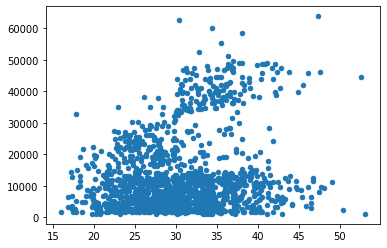

In [105]:
# the scatter plot of dataset X can be seen bellow
plt.scatter(X[:, 0], X[:, 1], cmap="Set1_r", s=20);

In [106]:
# bassed on kmeans of dataset X
# what is the best possible number of k clusters
from sklearn.cluster import KMeans

wcss=[]

for i in range(1,11):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

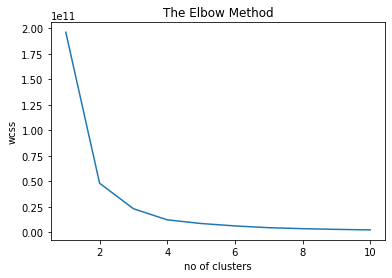

In [107]:
# using elbow method to find out the best number of clusters
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

In [108]:
kmeansmodel = KMeans(n_clusters= 4, init='k-means++', random_state=0)
y_kmeans= kmeansmodel.fit_predict(X)

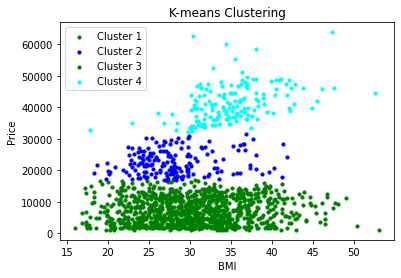

In [109]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 10, c = 'green', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 10, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 10, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 10, c = 'cyan', label = 'Cluster 4')
# plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 10, c = 'pink', label = 'Cluster 5')
#plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 50, c = 'yellow', label = 'Centroids')
plt.title('K-means Clustering')
plt.xlabel('BMI')
plt.ylabel('Price')
plt.legend()
plt.show()

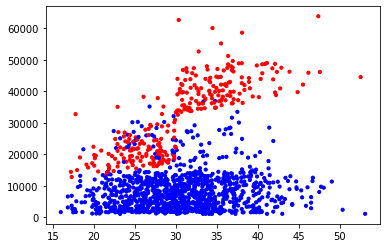

In [110]:
smokers = dataset.iloc[:, [2, 6 , 4]].values

# change yes/no to red/blue to see better understand the clusters
for i in range(len(smokers)):
    if smokers[i, 2] == "yes":
        smokers[i, 2] = "red"
    else:
        smokers[i, 2] = "blue"

plt.scatter(smokers[:, 0], smokers[:, 1], s=10, c=smokers[:, 2]);

This visualization gives valuable insight into understanding the clusters.
The three clusters can be separated into clear roles about the people in those clusters.
1. The cyan cluster represents the people that are obese (bmi over 30) and smoke.
2. The blue cluster represents the smokers.
3. The green cluster represents non smokers.
